In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
from warnings import filterwarnings
import warnings
warnings.filterwarnings('ignore')

# preprocessing and cleaning
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from kaggle.api.kaggle_api_extended import KaggleApi

/Users/minhhieu/conda/anaconda3/envs/mcp/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os
from dotenv import load_dotenv

# Load biến môi trường từ file .env (file .env cần nằm trong cùng thư mục với notebook)
load_dotenv()


True

In [10]:
username=os.getenv('KAGGLE_USERNAME')
key=os.getenv('KAGGLE_KEY')



# <div style="padding: 30px; color:white; margin:10; font-size:75%; text-align:left; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'>1 |</span></b> <b> LOAD DATA</b></div>

In [11]:
api = KaggleApi()
api.authenticate()

# Tải TRỰC TIẾP về path bạn muốn
target_path = "/Users/minhhieu/Documents/AI_VN"
api.dataset_download_files(
    "dongrelaxman/amazon-reviews-dataset",
    path=target_path,
    unzip=True
)
print(f"✅ Dataset đã được tải về: {target_path}")

Dataset URL: https://www.kaggle.com/datasets/dongrelaxman/amazon-reviews-dataset
✅ Dataset đã được tải về: /Users/minhhieu/Documents/AI_VN


In [3]:
import pandas as pd

# Thử với engine 'python' thay vì 'c' (mặc định)
df = pd.read_csv(
    '/Users/minhhieu/Documents/AI_VN/notebook_test/Amazon_Reviews.csv',
    engine='python',
    on_bad_lines='skip'  # Bỏ qua các dòng lỗi
)

In [4]:
df.shape

(21214, 9)

In [5]:
df.head()

,Reviewer Name,Profile Link,Country,Review Count,Review Date,Rating,Review Title,Review Text,Date of Experience
0,Eugene ath,/users/66e8185ff1598352d6b3701a,US,1 review,2024-09-16T13:44:26.000Z,Rated 1 out of 5 stars,A Store That Doesn't Want to Sell Anything,"I registered on the website, tried to order a ...","September 16, 2024"
1,Daniel ohalloran,/users/5d75e460200c1f6a6373648c,GB,9 reviews,2024-09-16T18:26:46.000Z,Rated 1 out of 5 stars,Had multiple orders one turned up and…,Had multiple orders one turned up and driver h...,"September 16, 2024"
2,p fisher,/users/546cfcf1000064000197b88f,GB,90 reviews,2024-09-16T21:47:39.000Z,Rated 1 out of 5 stars,I informed these reprobates,I informed these reprobates that I WOULD NOT B...,"September 16, 2024"
3,Greg Dunn,/users/62c35cdbacc0ea0012ccaffa,AU,5 reviews,2024-09-17T07:15:49.000Z,Rated 1 out of 5 stars,Advertise one price then increase it on website,I have bought from Amazon before and no proble...,"September 17, 2024"
4,Sheila Hannah,/users/5ddbe429478d88251550610e,GB,8 reviews,2024-09-16T18:37:17.000Z,Rated 1 out of 5 stars,If I could give a lower rate I would,If I could give a lower rate I would! I cancel...,"September 16, 2024"


# <div style="padding: 30px; color:white; margin:10; font-size:75%; text-align:left; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'>2 |</span></b> <b> Preprocessing</b></div>
 <!-- - missing values
 - duplicates
 - Normalization the location -->

In [6]:
df.isnull().sum()

Reviewer Name           0
Profile Link           51
Country               160
Review Count          159
Review Date           159
Rating                159
Review Title          159
Review Text           159
Date of Experience    267
dtype: int64

### Mapping Country 

In [7]:
print(df["Country"].unique())

['US' 'GB' 'AU' 'JP' 'CA' 'ZA' 'IN' 'BE' 'AE' 'NZ' 'IL' 'NL' 'SE' 'DK'
 'JM' 'DE' 'MY' 'FR' 'ES' 'IT' 'PR' 'KW' 'PK' 'PT' 'TW' 'IE' 'DO' 'TR'
 'HK' 'ME' 'FI' 'CH' 'CO' 'CY' 'PA' 'ID' 'EG' 'HR' 'BR' 'GR' 'PL' 'NI'
 'TH' 'SK' 'CN' 'VG' 'BH' 'CZ' 'GG' 'AT' 'MA' 'CV' 'GE' 'LT' 'MT' 'MC'
 'RU' 'UA' 'AG' 'OM' 'VI' 'VN' 'KH' 'NG' 'QA' 'NO' 'GH' 'CR' 'BO' 'MQ'
 'KE' 'PE' 'BS' 'RO' 'JE' 'PH' 'DZ' 'RS' 'AZ' 'AF' 'SA' 'AM' 'MV' 'EE'
 'HU' 'CM' 'PG' 'AR' 'BG' 'MX' 'LV' 'SL' 'CD' 'MO' 'GI' 'LU' 'AO' 'BD'
 'KR' 'KZ' 'ET' 'FJ' 'SG' 'UG' 'SR' 'EC' 'BY' 'SI' 'TN' 'HN' 'VE' 'NP'
 'BB' 'CW' 'GF' 'BZ' 'CL' 'GT' 'KG' 'MG' 'IM' 'TT' 'PY' 'LK' 'BA' nan 'LA'
 'TZ' 'IQ' 'BQ' 'GY' 'MN' 'IS' 'MD' 'UY' 'SO' 'RW' 'MU' 'BM' 'LB' 'IR'
 'JO' 'SV' 'BW' 'AD' 'CI' 'ZM' 'MK' None 'MM']


In [8]:
country_map = {
    'US': 'United States',
    'GB': 'United Kingdom',
    'AU': 'Australia',
    'JP': 'Japan',
    'CA': 'Canada',
    'ZA': 'South Africa',
    'IN': 'India',
    'BE': 'Belgium',
    'AE': 'United Arab Emirates',
    'NZ': 'New Zealand',
    'IL': 'Israel',
    'NL': 'Netherlands',
    'SE': 'Sweden',
    'DK': 'Denmark',
    'JM': 'Jamaica',
    'DE': 'Germany',
    'MY': 'Malaysia',
    'FR': 'France',
    'ES': 'Spain',
    'IT': 'Italy',
    'PR': 'Puerto Rico',
    'KW': 'Kuwait',
    'PK': 'Pakistan',
    'PT': 'Portugal',
    'TW': 'Taiwan',
    'IE': 'Ireland',
    'DO': 'Dominican Republic',
    'TR': 'Turkey',
    'HK': 'Hong Kong',
    'ME': 'Montenegro',
    'FI': 'Finland',
    'CH': 'Switzerland',
    'CO': 'Colombia',
    'CY': 'Cyprus',
    'PA': 'Panama',
    'ID': 'Indonesia',
    'EG': 'Egypt',
    'HR': 'Croatia',
    'BR': 'Brazil',
    'GR': 'Greece',
    'PL': 'Poland',
    'NI': 'Nicaragua',
    'TH': 'Thailand',
    'SK': 'Slovakia',
    'CN': 'China',
    'VG': 'British Virgin Islands',
    'BH': 'Bahrain',
    'CZ': 'Czech Republic',
    'GG': 'Guernsey',
    'AT': 'Austria',
    'MA': 'Morocco',
    'CV': 'Cape Verde',
    'GE': 'Georgia',
    'LT': 'Lithuania',
    'MT': 'Malta',
    'MC': 'Monaco',
    'RU': 'Russia',
    'UA': 'Ukraine',
    'AG': 'Antigua and Barbuda',
    'OM': 'Oman',
    'VI': 'U.S. Virgin Islands',
    'VN': 'Vietnam',
    'KH': 'Cambodia',
    'NG': 'Nigeria',
    'QA': 'Qatar',
    'NO': 'Norway',
    'GH': 'Ghana',
    'CR': 'Costa Rica',
    'BO': 'Bolivia',
    'MQ': 'Martinique',
    'KE': 'Kenya',
    'PE': 'Peru',
    'BS': 'Bahamas',
    'RO': 'Romania',
    'JE': 'Jersey',
    'PH': 'Philippines',
    'DZ': 'Algeria',
    'RS': 'Serbia',
    'AZ': 'Azerbaijan',
    'AF': 'Afghanistan',
    'SA': 'Saudi Arabia',
    'AM': 'Armenia',
    'MV': 'Maldives',
    'EE': 'Estonia',
    'HU': 'Hungary',
    'CM': 'Cameroon',
    'PG': 'Papua New Guinea',
    'AR': 'Argentina',
    'BG': 'Bulgaria',
    'MX': 'Mexico',
    'LV': 'Latvia',
    'SL': 'Sierra Leone',
    'CD': 'Congo (DRC)',
    'MO': 'Macau',
    'GI': 'Gibraltar',
    'LU': 'Luxembourg',
    'AO': 'Angola',
    'BD': 'Bangladesh',
    'KR': 'South Korea',
    'KZ': 'Kazakhstan',
    'ET': 'Ethiopia',
    'FJ': 'Fiji',
    'SG': 'Singapore',
    'UG': 'Uganda',
    'SR': 'Suriname',
    'EC': 'Ecuador',
    'BY': 'Belarus',
    'SI': 'Slovenia',
    'TN': 'Tunisia',
    'HN': 'Honduras',
    'VE': 'Venezuela',
    'NP': 'Nepal',
    'BB': 'Barbados',
    'CW': 'Curacao',
    'GF': 'French Guiana',
    'BZ': 'Belize',
    'CL': 'Chile',
    'GT': 'Guatemala',
    'KG': 'Kyrgyzstan',
    'MG': 'Madagascar',
    'IM': 'Isle of Man',
    'TT': 'Trinidad and Tobago',
    'PY': 'Paraguay',
    'LK': 'Sri Lanka',
    'BA': 'Bosnia and Herzegovina',
    'LA': 'Laos',
    'TZ': 'Tanzania',
    'IQ': 'Iraq',
    'BQ': 'Bonaire, Saint Eustatius and Saba',
    'GY': 'Guyana',
    'MN': 'Mongolia',
    'IS': 'Iceland',
    'MD': 'Moldova',
    'UY': 'Uruguay',
    'SO': 'Somalia',
    'RW': 'Rwanda',
    'MU': 'Mauritius',
    'BM': 'Bermuda',
    'LB': 'Lebanon',
    'IR': 'Iran',
    'JO': 'Jordan',
    'SV': 'El Salvador',
    'BW': 'Botswana',
    'AD': 'Andorra',
    'CI': "Côte d'Ivoire",
    'ZM': 'Zambia',
    'MK': 'North Macedonia',
    'MM': 'Myanmar'
}


In [9]:
def convert_country(code):
    if pd.isna(code) or code is None or str(code).strip().lower() in ["", "nan", "none"]:
        return "Do not mention"
    
    code = str(code).strip().upper()
    
    return country_map.get(code, "Do not mention")

## Apply for cCountry column
df["Country"] = df["Country"].apply(convert_country)


In [10]:
print(df["Country"].unique())

['United States' 'United Kingdom' 'Australia' 'Japan' 'Canada'
 'South Africa' 'India' 'Belgium' 'United Arab Emirates' 'New Zealand'
 'Israel' 'Netherlands' 'Sweden' 'Denmark' 'Jamaica' 'Germany' 'Malaysia'
 'France' 'Spain' 'Italy' 'Puerto Rico' 'Kuwait' 'Pakistan' 'Portugal'
 'Taiwan' 'Ireland' 'Dominican Republic' 'Turkey' 'Hong Kong' 'Montenegro'
 'Finland' 'Switzerland' 'Colombia' 'Cyprus' 'Panama' 'Indonesia' 'Egypt'
 'Croatia' 'Brazil' 'Greece' 'Poland' 'Nicaragua' 'Thailand' 'Slovakia'
 'China' 'British Virgin Islands' 'Bahrain' 'Czech Republic' 'Guernsey'
 'Austria' 'Morocco' 'Cape Verde' 'Georgia' 'Lithuania' 'Malta' 'Monaco'
 'Russia' 'Ukraine' 'Antigua and Barbuda' 'Oman' 'U.S. Virgin Islands'
 'Vietnam' 'Cambodia' 'Nigeria' 'Qatar' 'Norway' 'Ghana' 'Costa Rica'
 'Bolivia' 'Martinique' 'Kenya' 'Peru' 'Bahamas' 'Romania' 'Jersey'
 'Philippines' 'Algeria' 'Serbia' 'Azerbaijan' 'Afghanistan'
 'Saudi Arabia' 'Armenia' 'Maldives' 'Estonia' 'Hungary' 'Cameroon'
 'Papua New Guine

In [11]:
df.isnull().sum()

Reviewer Name           0
Profile Link           51
Country                 0
Review Count          159
Review Date           159
Rating                159
Review Title          159
Review Text           159
Date of Experience    267
dtype: int64

In [12]:
df = df.drop(columns=["Profile Link"])


In [13]:
df.isnull().sum()

Reviewer Name           0
Country                 0
Review Count          159
Review Date           159
Rating                159
Review Title          159
Review Text           159
Date of Experience    267
dtype: int64

### Drop Review Title and Text

In [14]:
missing_title_only = df[df["Review Title"].isna() & df["Review Text"].notna()]
print(len(missing_title_only))
# => mọi record mà review text null thì review title đều null ( drop được vì ảnh hưởng ít , có 159 records thôi )
# missing_text_only = df[df["Review Text"].isna() & df["Review Title"].notna()]
# print(len(missing_text_only))


0


In [15]:
df = df.dropna(subset=["Review Title", "Review Text"])


In [16]:
df.shape

(21055, 8)

In [17]:
df.isnull().sum()

Reviewer Name           0
Country                 0
Review Count            0
Review Date             0
Rating                  0
Review Title            0
Review Text             0
Date of Experience    108
dtype: int64

In [18]:
df["Date of Experience"] = df["Date of Experience"].fillna(df["Review Date"])


In [19]:
df.isnull().sum()

Reviewer Name         0
Country               0
Review Count          0
Review Date           0
Rating                0
Review Title          0
Review Text           0
Date of Experience    0
dtype: int64

# <div style="padding: 30px; color:white; margin:10; font-size:75%; text-align:left; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'>3 |</span></b> <b>NLP Text Preprocessing</b></div>
- Lowercase
- Remove icon/emoji/symbols
- Remove punctuations
- Remove stop words
- Lemmatize
- Tokenize

In [20]:
df["full_review"] = df["Review Title"].astype(str) + " " + df["Review Text"].astype(str)


In [21]:
df["full_review"].head()

0    A Store That Doesn't Want to Sell Anything I r...
1    Had multiple orders one turned up and… Had mul...
2    I informed these reprobates I informed these r...
3    Advertise one price then increase it on websit...
4    If I could give a lower rate I would If I coul...
Name: full_review, dtype: object

In [ ]:
df.head(9)

,Reviewer Name,Country,Review Count,Review Date,Rating,Review Title,Review Text,Date of Experience,full_review
0,Eugene ath,United States,1 review,2024-09-16T13:44:26.000Z,Rated 1 out of 5 stars,A Store That Doesn't Want to Sell Anything,"I registered on the website, tried to order a ...","September 16, 2024",A Store That Doesn't Want to Sell Anything I r...
1,Daniel ohalloran,United Kingdom,9 reviews,2024-09-16T18:26:46.000Z,Rated 1 out of 5 stars,Had multiple orders one turned up and…,Had multiple orders one turned up and driver h...,"September 16, 2024",Had multiple orders one turned up and… Had mul...
2,p fisher,United Kingdom,90 reviews,2024-09-16T21:47:39.000Z,Rated 1 out of 5 stars,I informed these reprobates,I informed these reprobates that I WOULD NOT B...,"September 16, 2024",I informed these reprobates I informed these r...
3,Greg Dunn,Australia,5 reviews,2024-09-17T07:15:49.000Z,Rated 1 out of 5 stars,Advertise one price then increase it on website,I have bought from Amazon before and no proble...,"September 17, 2024",Advertise one price then increase it on websit...
4,Sheila Hannah,United Kingdom,8 reviews,2024-09-16T18:37:17.000Z,Rated 1 out of 5 stars,If I could give a lower rate I would,If I could give a lower rate I would! I cancel...,"September 16, 2024",If I could give a lower rate I would If I coul...
5,Tamesha Hamilton,United States,4 reviews,2024-09-17T10:07:38.000Z,Rated 1 out of 5 stars,"Terrible, I had to hang up and call back",Terrible you get customer service reps that ar...,"August 16, 2024","Terrible, I had to hang up and call back Terr..."
6,Irene Rousseau,United States,30 reviews,2024-09-16T23:43:32.000Z,Rated 1 out of 5 stars,Yet again,Amazon has a way of tainting a great product d...,"September 16, 2024",Yet again Amazon has a way of tainting a grea...
7,Jacqueline Novak,United States,2 reviews,2024-09-15T18:07:45.000Z,Rated 5 out of 5 stars,I love amazon,I love amazon! I use it for half my shopping. ...,"September 15, 2024",I love amazon I love amazon! I use it for half...
8,Robert Field,United Kingdom,1 review,2024-09-17T13:00:12.000Z,Rated 1 out of 5 stars,I applied for a job with Amazon,I applied for a job with Amazon. I completed a...,"September 17, 2024",I applied for a job with Amazon I applied for ...


In [30]:
df.head(9)

,Reviewer Name,Country,Review Count,Review Date,Rating,Review Title,Review Text,Date of Experience,full_review
0,Eugene ath,United States,1 review,2024-09-16T13:44:26.000Z,Rated 1 out of 5 stars,A Store That Doesn't Want to Sell Anything,"I registered on the website, tried to order a ...","September 16, 2024",A Store That Doesn't Want to Sell Anything I r...
1,Daniel ohalloran,United Kingdom,9 reviews,2024-09-16T18:26:46.000Z,Rated 1 out of 5 stars,Had multiple orders one turned up and…,Had multiple orders one turned up and driver h...,"September 16, 2024",Had multiple orders one turned up and… Had mul...
2,p fisher,United Kingdom,90 reviews,2024-09-16T21:47:39.000Z,Rated 1 out of 5 stars,I informed these reprobates,I informed these reprobates that I WOULD NOT B...,"September 16, 2024",I informed these reprobates I informed these r...
3,Greg Dunn,Australia,5 reviews,2024-09-17T07:15:49.000Z,Rated 1 out of 5 stars,Advertise one price then increase it on website,I have bought from Amazon before and no proble...,"September 17, 2024",Advertise one price then increase it on websit...
4,Sheila Hannah,United Kingdom,8 reviews,2024-09-16T18:37:17.000Z,Rated 1 out of 5 stars,If I could give a lower rate I would,If I could give a lower rate I would! I cancel...,"September 16, 2024",If I could give a lower rate I would If I coul...
5,Tamesha Hamilton,United States,4 reviews,2024-09-17T10:07:38.000Z,Rated 1 out of 5 stars,"Terrible, I had to hang up and call back",Terrible you get customer service reps that ar...,"August 16, 2024","Terrible, I had to hang up and call back Terr..."
6,Irene Rousseau,United States,30 reviews,2024-09-16T23:43:32.000Z,Rated 1 out of 5 stars,Yet again,Amazon has a way of tainting a great product d...,"September 16, 2024",Yet again Amazon has a way of tainting a grea...
7,Jacqueline Novak,United States,2 reviews,2024-09-15T18:07:45.000Z,Rated 5 out of 5 stars,I love amazon,I love amazon! I use it for half my shopping. ...,"September 15, 2024",I love amazon I love amazon! I use it for half...
8,Robert Field,United Kingdom,1 review,2024-09-17T13:00:12.000Z,Rated 1 out of 5 stars,I applied for a job with Amazon,I applied for a job with Amazon. I completed a...,"September 17, 2024",I applied for a job with Amazon I applied for ...


In [29]:
df["full_review"][8]

"I applied for a job with Amazon I applied for a job with Amazon. I completed all the steps (including sending confidential data and personal information), when I attended the 'Pre-hire appointment' at the scheduled time, no one was on the other end of the video call!So I tried to speak to someone at Amazon to reschedule this, but due to language barriers with the Amazon call handlers, this has been very difficult.Why can't you lot have a phone call interview?? It really is the utmost rudeness when I have sent everything Amazon asked for, promptly and fully, and your recruitment team can't even answer a video call at the scheduled time?? And why can't I get through to speak to someone who can understand what I'm saying? I'm about to withdraw my application, if the recruitment process is this disorganised then I hate to think what the job's like!"

In [31]:
df['full_review'] = df['full_review'].apply(lambda x :x.lower())

In [32]:
df["full_review"].head()

0    a store that doesn't want to sell anything i r...
1    had multiple orders one turned up and… had mul...
2    i informed these reprobates i informed these r...
3    advertise one price then increase it on websit...
4    if i could give a lower rate i would if i coul...
Name: full_review, dtype: object

In [34]:
df['full_review'] = df['full_review'].str.replace('\W', ' ', regex=True)

In [35]:
df["full_review"].head()

0    a store that doesn t want to sell anything i r...
1    had multiple orders one turned up and  had mul...
2    i informed these reprobates i informed these r...
3    advertise one price then increase it on websit...
4    if i could give a lower rate i would if i coul...
Name: full_review, dtype: object

**remove number**

In [38]:
import re
df['full_review'] = df['full_review'].apply(lambda x: re.sub(r'\d+', '', x))

In [39]:
df['full_review'].head()

0    a store that doesn t want to sell anything i r...
1    had multiple orders one turned up and  had mul...
2    i informed these reprobates i informed these r...
3    advertise one price then increase it on websit...
4    if i could give a lower rate i would if i coul...
Name: full_review, dtype: object

**remove stop words**

In [41]:
import nltk
from nltk.corpus import stopwords

In [43]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/minhhieu/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [45]:
import nltk
print(nltk.data.path)


['/Users/minhhieu/nltk_data', '/Users/minhhieu/conda/anaconda3/envs/mcp/nltk_data', '/Users/minhhieu/conda/anaconda3/envs/mcp/share/nltk_data', '/Users/minhhieu/conda/anaconda3/envs/mcp/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


In [44]:
sw = stopwords.words('english')
df['full_review'] = df['full_review'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

In [47]:
df['full_review'].head()

0    store want sell anything registered website tr...
1    multiple orders one turned multiple orders one...
2    informed reprobates informed reprobates would ...
3    advertise one price increase website bought am...
4    could give lower rate would could give lower r...
Name: full_review, dtype: object

**Remove Blank**

In [48]:
df['full_review'] = df['full_review'].str.replace(r'\s+', ' ', regex=True).str.strip()
df['full_review'].head()

0    store want sell anything registered website tr...
1    multiple orders one turned multiple orders one...
2    informed reprobates informed reprobates would ...
3    advertise one price increase website bought am...
4    could give lower rate would could give lower r...
Name: full_review, dtype: object

In [49]:
df.head()

,Reviewer Name,Country,Review Count,Review Date,Rating,Review Title,Review Text,Date of Experience,full_review
0,Eugene ath,United States,1 review,2024-09-16T13:44:26.000Z,Rated 1 out of 5 stars,A Store That Doesn't Want to Sell Anything,"I registered on the website, tried to order a ...","September 16, 2024",store want sell anything registered website tr...
1,Daniel ohalloran,United Kingdom,9 reviews,2024-09-16T18:26:46.000Z,Rated 1 out of 5 stars,Had multiple orders one turned up and…,Had multiple orders one turned up and driver h...,"September 16, 2024",multiple orders one turned multiple orders one...
2,p fisher,United Kingdom,90 reviews,2024-09-16T21:47:39.000Z,Rated 1 out of 5 stars,I informed these reprobates,I informed these reprobates that I WOULD NOT B...,"September 16, 2024",informed reprobates informed reprobates would ...
3,Greg Dunn,Australia,5 reviews,2024-09-17T07:15:49.000Z,Rated 1 out of 5 stars,Advertise one price then increase it on website,I have bought from Amazon before and no proble...,"September 17, 2024",advertise one price increase website bought am...
4,Sheila Hannah,United Kingdom,8 reviews,2024-09-16T18:37:17.000Z,Rated 1 out of 5 stars,If I could give a lower rate I would,If I could give a lower rate I would! I cancel...,"September 16, 2024",could give lower rate would could give lower r...


**Lemmatize**

In [52]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/minhhieu/nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/minhhieu/nltk_data...


True

In [53]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize(sentence):
    token = sentence.split(' ')
    lem_list = ''
    for word in token:
        lem_list += lemmatizer.lemmatize(word) + ' '
    return lem_list

df['full_review'] = df["full_review"].apply(lambda x : lemmatize(x))
df['full_review'].head()

0    store want sell anything registered website tr...
1    multiple order one turned multiple order one t...
2    informed reprobate informed reprobate would go...
3    advertise one price increase website bought am...
4    could give lower rate would could give lower r...
Name: full_review, dtype: object

**Tokenizer**

In [57]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /Users/minhhieu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/minhhieu/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/minhhieu/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [58]:
from textblob import Word, TextBlob
df['full_review'].apply(lambda x: TextBlob(x).words).head()

0    [store, want, sell, anything, registered, webs...
1    [multiple, order, one, turned, multiple, order...
2    [informed, reprobate, informed, reprobate, wou...
3    [advertise, one, price, increase, website, bou...
4    [could, give, lower, rate, would, could, give,...
Name: full_review, dtype: object

In [59]:
df.head()

,Reviewer Name,Country,Review Count,Review Date,Rating,Review Title,Review Text,Date of Experience,full_review
0,Eugene ath,United States,1 review,2024-09-16T13:44:26.000Z,Rated 1 out of 5 stars,A Store That Doesn't Want to Sell Anything,"I registered on the website, tried to order a ...","September 16, 2024",store want sell anything registered website tr...
1,Daniel ohalloran,United Kingdom,9 reviews,2024-09-16T18:26:46.000Z,Rated 1 out of 5 stars,Had multiple orders one turned up and…,Had multiple orders one turned up and driver h...,"September 16, 2024",multiple order one turned multiple order one t...
2,p fisher,United Kingdom,90 reviews,2024-09-16T21:47:39.000Z,Rated 1 out of 5 stars,I informed these reprobates,I informed these reprobates that I WOULD NOT B...,"September 16, 2024",informed reprobate informed reprobate would go...
3,Greg Dunn,Australia,5 reviews,2024-09-17T07:15:49.000Z,Rated 1 out of 5 stars,Advertise one price then increase it on website,I have bought from Amazon before and no proble...,"September 17, 2024",advertise one price increase website bought am...
4,Sheila Hannah,United Kingdom,8 reviews,2024-09-16T18:37:17.000Z,Rated 1 out of 5 stars,If I could give a lower rate I would,If I could give a lower rate I would! I cancel...,"September 16, 2024",could give lower rate would could give lower r...


**WordCloud**

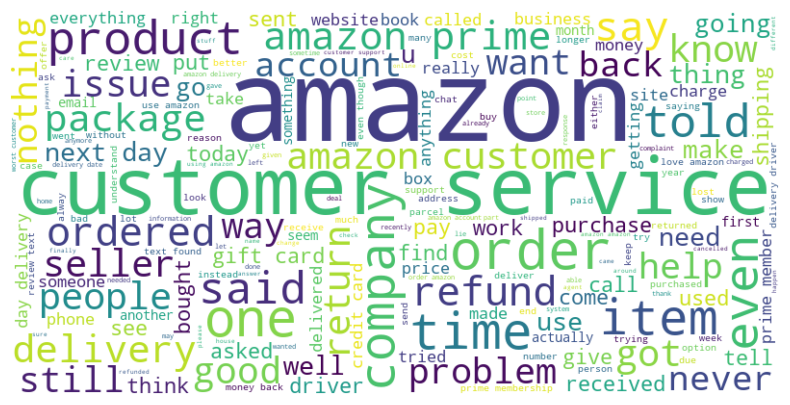

In [63]:
from wordcloud import WordCloud
text = ' '.join(df['full_review'])

wordcloud = WordCloud(
    width = 800,
    height = 400,
    background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# <div style="padding: 30px; color:white; margin:10; font-size:75%; text-align:left; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'>5 |</span></b> <b>Building Models</b></div>
- Label Data with Sentiment Scores and Sentiment Labels
- TF-IDF , TF-IDF N GRAMS
- Machine Learning : Logistic Regression
- Deep Learning : LSTM

In [64]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/minhhieu/nltk_data...


True

In [72]:
# df.head()

In [69]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sen = SentimentIntensityAnalyzer()

In [ ]:
df["full_review"][0:10].apply(lambda x: sen.polarity_scores(x))

0    {'neg': 0.03, 'neu': 0.742, 'pos': 0.228, 'com...
1    {'neg': 0.089, 'neu': 0.836, 'pos': 0.075, 'co...
2    {'neg': 0.195, 'neu': 0.783, 'pos': 0.022, 'co...
3    {'neg': 0.251, 'neu': 0.583, 'pos': 0.166, 'co...
4    {'neg': 0.194, 'neu': 0.575, 'pos': 0.232, 'co...
5    {'neg': 0.164, 'neu': 0.637, 'pos': 0.199, 'co...
6    {'neg': 0.095, 'neu': 0.486, 'pos': 0.419, 'co...
7    {'neg': 0.0, 'neu': 0.541, 'pos': 0.459, 'comp...
8    {'neg': 0.127, 'neu': 0.74, 'pos': 0.133, 'com...
9    {'neg': 0.098, 'neu': 0.54, 'pos': 0.362, 'com...
Name: full_review, dtype: object

In [75]:
# df.head()
df["full_review"][0:10].apply(lambda x: sen.polarity_scores(x)["compound"])

0    0.8898
1   -0.3612
2   -0.8860
3   -0.6997
4    0.3695
5    0.0772
6    0.9360
7    0.9432
8   -0.3566
9    0.8519
Name: full_review, dtype: float64

In [76]:
df["full_review"][0:10].apply(lambda x: "pos" if sen.polarity_scores(x)["compound"] > 0 else "neg")

0    pos
1    neg
2    neg
3    neg
4    pos
5    pos
6    pos
7    pos
8    neg
9    pos
Name: full_review, dtype: object

In [78]:
# 1. Hàm tiện ích: lấy nhãn 3 lớp từ compound
def vader_label(text, pos_th=0.05, neg_th=-0.05):
    scores = sen.polarity_scores(text)
    c = scores["compound"]
    if c >= pos_th:
        return "pos"
    elif c <= neg_th:
        return "neg"
    else:
        return "neu"

# 2. Tạo cột điểm compound và nhãn sentiment 3 lớp
df["polarity_score"] = df["full_review"].apply(
    lambda x: sen.polarity_scores(x)["compound"]
)

df["Sentiment_Label"] = df["full_review"].apply(vader_label)

In [79]:
df.head()

,Reviewer Name,Country,Review Count,Review Date,Rating,Review Title,Review Text,Date of Experience,full_review,polarity_score,Sentiment_Label
0,Eugene ath,United States,1 review,2024-09-16T13:44:26.000Z,Rated 1 out of 5 stars,A Store That Doesn't Want to Sell Anything,"I registered on the website, tried to order a ...","September 16, 2024",store want sell anything registered website tr...,0.8898,pos
1,Daniel ohalloran,United Kingdom,9 reviews,2024-09-16T18:26:46.000Z,Rated 1 out of 5 stars,Had multiple orders one turned up and…,Had multiple orders one turned up and driver h...,"September 16, 2024",multiple order one turned multiple order one t...,-0.3612,neg
2,p fisher,United Kingdom,90 reviews,2024-09-16T21:47:39.000Z,Rated 1 out of 5 stars,I informed these reprobates,I informed these reprobates that I WOULD NOT B...,"September 16, 2024",informed reprobate informed reprobate would go...,-0.8860,neg
3,Greg Dunn,Australia,5 reviews,2024-09-17T07:15:49.000Z,Rated 1 out of 5 stars,Advertise one price then increase it on website,I have bought from Amazon before and no proble...,"September 17, 2024",advertise one price increase website bought am...,-0.6997,neg
4,Sheila Hannah,United Kingdom,8 reviews,2024-09-16T18:37:17.000Z,Rated 1 out of 5 stars,If I could give a lower rate I would,If I could give a lower rate I would! I cancel...,"September 16, 2024",could give lower rate would could give lower r...,0.3695,pos


**Trainning**

In [81]:
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split,KFold

In [82]:
X = df["full_review"] 
y = df['Sentiment_Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
# In ra các kích thước của tập huấn luyện và tập kiểm tra
print("Train X shape:", X_train.shape)
print("Test X shape:", X_test.shape)
print("Train Y shape:", y_train.shape)
print("Test Y shape:", y_test.shape)

Train X shape: (16844,)
Test X shape: (4211,)
Train Y shape: (16844,)
Test Y shape: (4211,)


In [85]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [86]:
# Tạo TF-IDF vectorizer và biến đổi văn bản thành vector TF-IDF
tf_idf_vectorizer = TfidfVectorizer().fit(X_train)
x_train_tf_idf = tf_idf_vectorizer.transform(X_train)
x_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [87]:
# TF-IDF N-Gram Level (2,2)
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range=(2, 2)).fit(X_train)
x_train_tf_idf_ngram = tf_idf_ngram_vectorizer.transform(X_train)
x_test_tf_idf_ngram = tf_idf_ngram_vectorizer.transform(X_test)

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [93]:
# Modelling(Logistic Regression - word level) 
log_model_word = LogisticRegression().fit(x_train_tf_idf, y_train)
y_pred_word = log_model_word.predict(x_test_tf_idf)

print(classification_report(y_pred_word, y_test))

              precision    recall  f1-score   support

         neg       0.85      0.85      0.85      1617
         neu       0.08      0.87      0.15        15
         pos       0.92      0.87      0.89      2579

    accuracy                           0.86      4211
   macro avg       0.62      0.86      0.63      4211
weighted avg       0.89      0.86      0.87      4211



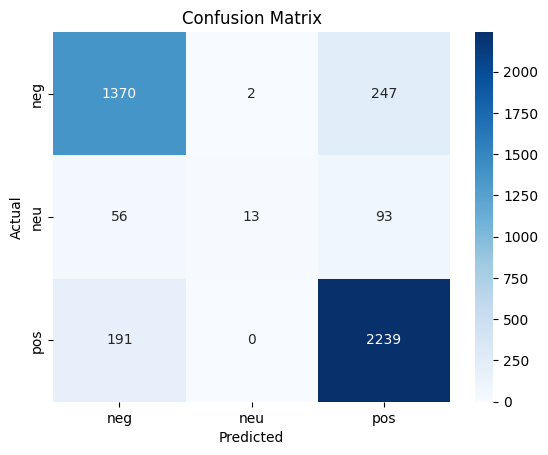

In [94]:
cm = confusion_matrix(y_test, y_pred_word, labels=['neg', 'neu', 'pos'])

# Hiển thị confusion matrix dưới dạng heatmap
ax = sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['neg', 'neu', 'pos'], yticklabels=['neg', 'neu', 'pos'])
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
ax.set_title('Confusion Matrix')
plt.show()

In [95]:
# Modelling(Logistic Regression - n-gram level)
log_model_ngram = LogisticRegression().fit(x_train_tf_idf_ngram, y_train)
y_pred_ngram = log_model_ngram.predict(x_test_tf_idf_ngram)

print(classification_report(y_test, y_pred_ngram))

              precision    recall  f1-score   support

         neg       0.76      0.54      0.63      1619
         neu       0.61      0.07      0.12       162
         pos       0.72      0.90      0.80      2430

    accuracy                           0.73      4211
   macro avg       0.69      0.50      0.52      4211
weighted avg       0.73      0.73      0.71      4211



In [101]:
# Nhập câu văn từ người dùng
sentence = input("Enter a sentence to predict its sentiment: ")

# Chuyển đổi câu văn thành các vector TF-IDF và n-gram
tf_idf_word_vector = tf_idf_vectorizer.transform([sentence])
tf_idf_ngram_vector = tf_idf_ngram_vectorizer.transform([sentence])

# Dự đoán sentiment sử dụng mô hình word level
prediction_word = log_model_word.predict(tf_idf_word_vector)

# Dự đoán sentiment sử dụng mô hình n-gram level
prediction_ngram = log_model_ngram.predict(tf_idf_ngram_vector)

# In kết quả dự đoán
print(f"The sentiment of the sentence '{sentence}' using word level model is {prediction_word[0]}.")
print(f"The sentiment of the sentence '{sentence}' using n-gram level model is {prediction_ngram[0]}.")

The sentiment of the sentence 'This is the worst purchase I have made this year.' using word level model is neg.
The sentiment of the sentence 'This is the worst purchase I have made this year.' using n-gram level model is pos.
